In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


housing = pd.read_csv("files/housing.csv")
housing_cat = housing[["ocean_proximity"]]
housing_num = housing.select_dtypes(np.number)

In [6]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

In [26]:
from sklearn.cluster import KMeans

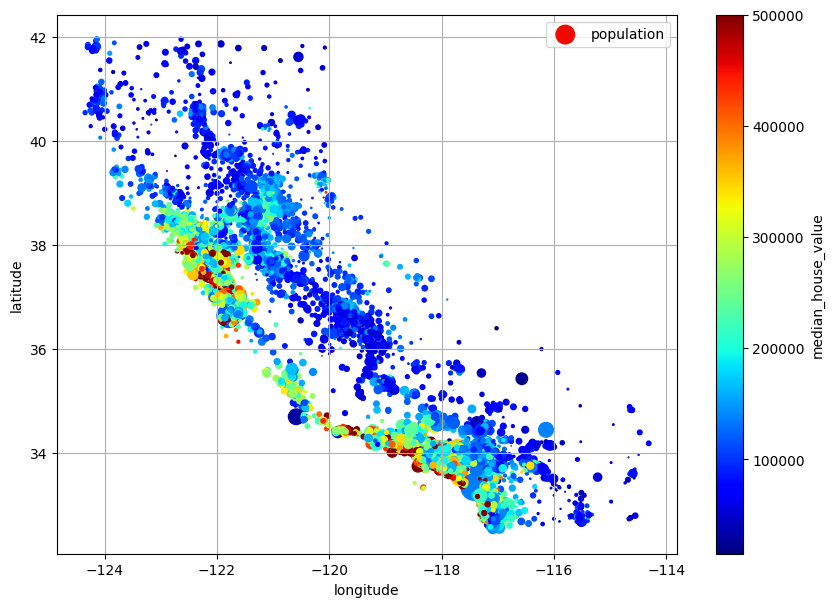

In [4]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
s=housing["population"] / 100, label="population",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [19]:
class StandardScalerClone(BaseEstimator, TransformerMixin):
    
    def __init__(self, with_mean = True):
        self.with_mean = with_mean
        
    def fit(self, X, y=None):
#         X = check_array(X)
        
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis= 0)
        self.n_features_in_ = X.shape[1]
        
        return self
        
    def transform(self, X):
        check_is_fitted(self)
#         X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        
        if self.with_mean == True:
            X = X - self.mean_
        
        return X/self.scale_
        

In [20]:
arr2d = np.arange(9).reshape(3,3)
df = pd.DataFrame(arr2d, columns= ["A", "B", "C"])
df

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8


In [21]:
slr = StandardScalerClone(with_mean= False)

In [22]:
slr.fit(df)

StandardScalerClone(with_mean=False)

In [23]:
slr.transform(df)

,A,B,C
0,0.0,0.333333,0.666667
1,1.0,1.333333,1.666667
2,2.0,2.333333,2.666667


In [24]:
df.shape

(3, 3)

In [25]:
slr.fit_transform(df)

,A,B,C
0,0.0,0.333333,0.666667
1,1.0,1.333333,1.666667
2,2.0,2.333333,2.666667


In [53]:
class ClusterSimilarity(BaseEstimator,  TransformerMixin):
    
    def __init__(self, n_clusters = 10, gamma = 0.1, random_state = None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        
    def fit(self, X, y = None, sample_weight = None):
        self.kmean_ = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.kmean_.fit(X, sample_weight= sample_weight)
        return self
    
    def transform(self, X):
#         return rbf_kernel(X, self.kmean_.cluster_centers_, gamma= self.gamma)
        return self.kmean_.transform(X)

    
    def get_feature_names_out(self, names = None):
        return [f"cluster {i} similarity" for i in range(self.n_clusters)]

In [54]:
loc= housing_num[["latitude", "longitude"]]
cluster_similarity = ClusterSimilarity()

In [55]:
cluster_similarity.fit(loc)

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ClusterSimilarity()

In [56]:
arr = cluster_similarity.transform(loc)
arr

array([[5.58680014, 1.12725959, 7.2543169 , ..., 0.7149208 , 6.2196746 ,
        2.81943798],
       [5.56572181, 1.12452656, 7.23331754, ..., 0.69256027, 6.1993976 ,
        2.84165914],
       [5.57323928, 1.14674821, 7.24104201, ..., 0.69284018, 6.20887176,
        2.84423023],
       ...,
       [6.20797284, 1.18469229, 7.79988233, ..., 2.29742331, 6.65552806,
        2.26414688],
       [6.25707816, 1.19360388, 7.8549891 , ..., 2.26928384, 6.7139354 ,
        2.17721028],
       [6.16537487, 1.12593534, 7.76072908, ..., 2.23418562, 6.61839306,
        2.27657445]])

In [57]:
arr.shape

(20640, 10)

In [36]:
clm = cluster_similarity.get_feature_names_out()

In [37]:
clm

['cluster 0 similarity',
 'cluster 1 similarity',
 'cluster 2 similarity',
 'cluster 3 similarity',
 'cluster 4 similarity',
 'cluster 5 similarity',
 'cluster 6 similarity',
 'cluster 7 similarity',
 'cluster 8 similarity',
 'cluster 9 similarity']

In [38]:
dft = pd.DataFrame(arr, columns= clm)
dft

,cluster 0 similarity,cluster 1 similarity,cluster 2 similarity,cluster 3 similarity,cluster 4 similarity,cluster 5 similarity,cluster 6 similarity,cluster 7 similarity,cluster 8 similarity,cluster 9 similarity
0,0.025163,0.998703,0.442974,0.705850,0.463733,0.005297,0.048334,0.888823,0.949969,0.210640
1,0.025800,0.998222,0.447424,0.702860,0.458036,0.005460,0.049468,0.889404,0.952969,0.214261
2,0.025531,0.998443,0.443896,0.697771,0.457343,0.005398,0.049064,0.885097,0.952935,0.213313
3,0.025297,0.998607,0.441599,0.696323,0.458188,0.005341,0.048676,0.883247,0.952301,0.212206
4,0.025297,0.998607,0.441599,0.696323,0.458188,0.005341,0.048676,0.883247,0.952301,0.212206
...,...,...,...,...,...,...,...,...,...,...
20635,0.013697,0.676708,0.366561,0.998496,0.586519,0.002497,0.023732,0.852108,0.565319,0.099502
20636,0.012450,0.693953,0.351620,0.999754,0.616862,0.002227,0.021912,0.850951,0.573176,0.095092
20637,0.013212,0.708308,0.362511,0.999970,0.611680,0.002387,0.023245,0.863684,0.589488,0.100126
20638,0.012286,0.723446,0.350966,0.998694,0.635347,0.002188,0.021895,0.862456,0.597110,0.096921


In [39]:
clu_simil = ClusterSimilarity(n_clusters=5, gamma= 0.01, random_state= 42)
clu_simil.fit_transform(loc)

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[0.99872807, 0.72858277, 0.59921162, 0.95913134, 0.90903962],
       [0.99880885, 0.73030292, 0.60100061, 0.95833159, 0.91014232],
       [0.99866957, 0.72966772, 0.600306  , 0.95795943, 0.90954428],
       ...,
       [0.97094203, 0.67848762, 0.55489556, 0.98617843, 0.87467616],
       [0.97211797, 0.67424887, 0.55011202, 0.98819695, 0.87194809],
       [0.97300928, 0.68203862, 0.55817545, 0.98598005, 0.87761476]])

In [40]:
clu_simil.kmean_

KMeans(n_clusters=5, random_state=42)

In [41]:
clu_simil.kmean_.cluster_centers_

array([[  37.84268714, -121.87520154],
       [  34.0188    , -118.13652479],
       [  33.05914561, -116.94101056],
       [  39.92177291, -122.29236056],
       [  36.09769141, -119.70808884]])

In [42]:
km = KMeans(n_clusters= 2, random_state= 20, tol= 0.001)
km.fit(loc)

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=20, tol=0.001)

In [43]:
km.cluster_centers_

array([[  33.94057002, -118.00729556],
       [  37.9562441 , -121.71696077]])

In [49]:
km.predict(loc).max()

1

In [51]:
km.transform(loc).shape

(20640, 2)